In [28]:
from pandas import read_csv
import numpy as np

In [29]:
df=read_csv('international-airline-passengers.csv',usecols=[1])

In [30]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [31]:
values=df.values.astype('float32')
values.shape

(144, 1)

In [32]:
train_size=int((values.shape[0]*(2/3)))

In [33]:
train_size


96

In [34]:
train=values[0:train_size]
test=values[train_size:]

In [35]:
train.shape

(96, 1)

In [36]:
test.shape


(48, 1)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train=scaler.fit_transform(train)
test=scaler.transform(test)

In [38]:
def create_dataset(data,k):
    dataX,dataY=[],[]
    for i in range(data.shape[0]-k):
        dataX.append(data[i:i+k,0])
        dataY.append(data[i+k,0])
        
    return np.array(dataX),np.array(dataY)    

In [40]:
look_back=12
TestX,TestY=create_dataset(test,12)
TrainX,TrainY=create_dataset(train,12)

In [42]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [44]:
TrainX=np.reshape(TrainX,(TrainX.shape[0],TrainX.shape[1],1))

In [45]:
model=Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(TrainX,TrainY,epochs=100,batch_size=1)

Epoch 1/100
84/84 [==============================] - 4s 43ms/step - loss: 0.0525
Epoch 2/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0266
Epoch 3/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0207
Epoch 4/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0181
Epoch 5/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0163
Epoch 6/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0146
Epoch 7/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0130
Epoch 8/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0124
Epoch 9/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0113
Epoch 10/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0103
Epoch 11/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0099
Epoch 12/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0089
Epoch 13/100
84/84 [================

In [61]:
TestX=np.reshape(TestX,(TestX.shape[0],TestX.shape[1],1))
testPredict=model.predict(TestX)
testPredict=scaler.inverse_transform(testPredict).ravel()

trainPredict=model.predict(TrainX)
trainPredict=scaler.inverse_transform(trainPredict).ravel()

testTrue=scaler.inverse_transform([TestY]).ravel()
trainTrue=scaler.inverse_transform([TrainY]).ravel()




In [62]:
from matplotlib import pyplot as plt


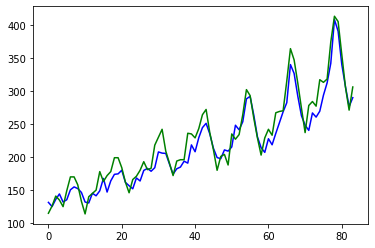

In [63]:
plt.plot(trainPredict,c='b')
plt.plot(trainTrue,c='g')
plt.show()


In [64]:
trainPredict.shape

(84,)

In [65]:
trainTrue.shape

(84,)

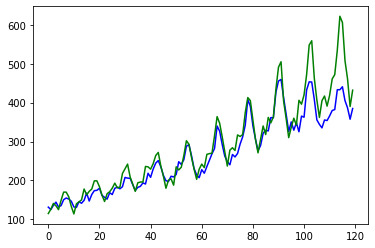

In [66]:
combinedPredicted=np.concatenate((trainPredict,testPredict))
combinedTrue=np.concatenate((trainTrue,testTrue))
plt.plot(combinedPredicted,c='b')
plt.plot(combinedTrue,c='g')
plt.show()
